## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings; warnings.filterwarnings("ignore")

## Read Data

In [2]:
data_path = '../data/'

pdde = pd.read_csv(data_path+"DC_LPOINT_PDDE.csv", parse_dates=['date','de_dt']) # [DC] 유통사 상품 구매 내역

In [3]:
trade = pdde.groupby(['cust','cop_c','chnl_dv','br_c','date'])\
        .agg({'pd_c':[('상품종류수', pd.Series.nunique)],'buy_am':[('금액', sum)],'buy_ct':[('수량', sum)]})
trade.columns = trade.columns.get_level_values(1) ; trade.reset_index(inplace=True)

trade = trade.merge(pdde[['cust','ages']].drop_duplicates(), on='cust', how='left')
display(trade.sample(5))

,cust,cop_c,chnl_dv,br_c,date,상품종류수,금액,수량,ages
639882,M656822898,A01,1,A010028,2021-04-21 16:00:00,1,78000.0,1,50대
417818,M425505996,A04,1,A042739,2021-07-08 12:00:00,1,1700.0,2,40대
520022,M533492280,A02,1,A020099,2021-11-23 18:00:00,3,19810.0,4,40대
846408,M869872665,A04,1,A042067,2021-03-28 07:00:00,1,40000.0,1,40대
831328,M854020936,A02,1,A020052,2021-07-17 20:00:00,18,265110.0,56,40대


- MZ세대와 비MZ세대 비교<br>
  『강윤지, 김상훈 (2022), "기업의 ESG 경영에 대한 소비자 인식에 관한 연구 : MZ세대를 중심으로", 광고학연구 제33권 제3호, p.7-39』는<br>
  비MZ세대가 MZ세대에 비해 ESG 경영에 대한 인식이 높으나 ESG 경영에 참여율이 높은 건 MZ세대라 밝혔다. 그리고 그 이유를 MZ세대는 소셜미디어, IT인프라를 활발히 사용해 온라인 공간에서 사회적 문제에 자주 접하고 정보를 쉽게 얻을 수 있는 반면에 비MZ세대는 그렇지 못함을 꼽았다.<br>
  MZ세대의 온라인 활동이 활발한 지 살펴본다.

In [4]:
# MZ세대는 1980년 이후 출생자로 2021년 당시 42세 이하의 고객들이다.
trade['MZ'] = trade['ages'].apply(lambda x: 1 if int(x[0]) < 4 else 0)

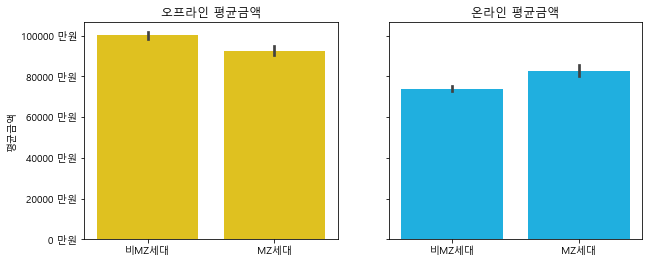

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True)
sns.barplot(data=trade.query('chnl_dv==1'), x='MZ', y='금액', ax=ax[0], color='gold')
sns.barplot(data=trade.query('chnl_dv==2'), x='MZ', y='금액', ax=ax[1], color='deepskyblue')
ax[0].set_title("오프라인 평균금액")
ax[0].yaxis.set_major_formatter(mticker.FormatStrFormatter('%i 만원'))
ax[1].set_title("온라인 평균금액")
plt.xticks([0,1],['비MZ세대','MZ세대'])
ax[0].set_xlabel('');ax[1].set_xlabel('')
ax[0].set_ylabel("평균금액");ax[1].set_ylabel('')
plt.show()

- MZ세대와 비MZ세대간 비교

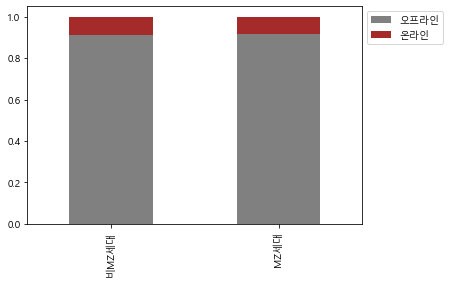

In [9]:
# MZ세대이면 온라인을, 비MZ세대이면 오프라인을 주로 이용할 것이라 추측한 바와 다르게 도출된다.
use = pd.pivot_table(trade, index='MZ', columns='chnl_dv', values='금액', aggfunc=np.size, margins=True)
use.divide(use['All'], axis=0).iloc[:-1, :-1].plot.bar(stacked=True, color=['gray','brown'])
plt.xticks([0,1],['비MZ세대','MZ세대'])
plt.xlabel('')
plt.legend(['오프라인','온라인'], bbox_to_anchor=(1,1))
plt.show()

- 연령대간의 비교

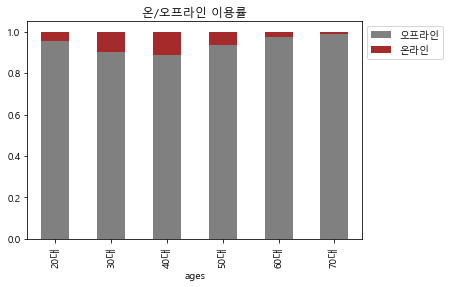

In [10]:
use = pd.pivot_table(trade, index='ages',columns='chnl_dv',values='금액',aggfunc=np.size,margins=True)
use.divide(use['All'], axis=0).iloc[:-1,:-1].plot.bar(stacked=True, title="온/오프라인 이용률", color=['gray','brown'])
plt.legend(['오프라인','온라인'], bbox_to_anchor=(1,1))
plt.show()

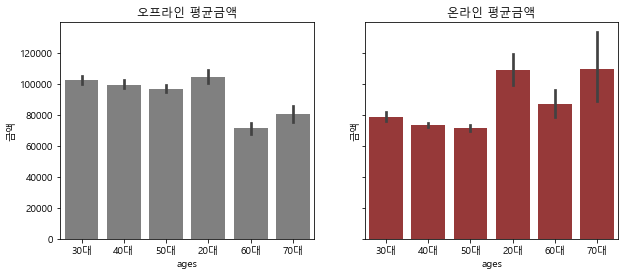

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True)
sns.barplot(data=trade.query('chnl_dv==1'), x='ages', y='금액', ax=ax[0], color='gray')
sns.barplot(data=trade.query('chnl_dv==2'), x='ages', y='금액', ax=ax[1], color='brown')
ax[0].set_title("오프라인 평균금액")
ax[1].set_title("온라인 평균금액")
plt.show()